Task 1: Customer Segmentation Using Clustering Techniques

In [12]:
# Install library if needed.
# pip install pandas numpy scikit-learn matplotlib

Load and Preprocess the Data

Clustering customers based on their total sales and the frequency of their orders.

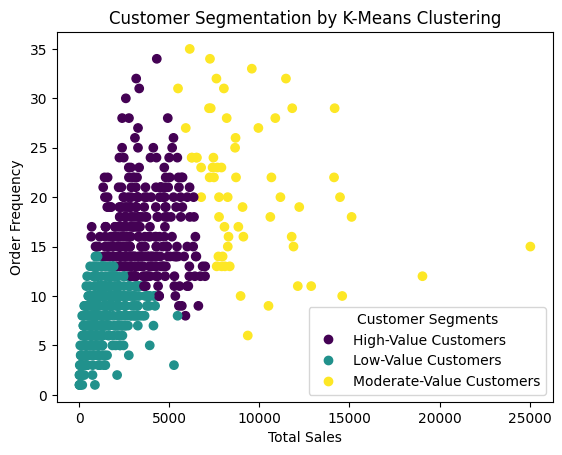

In [17]:
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.preprocessing import StandardScaler  # For scaling data
import joblib #For saving model


# Load the dataset
df = pd.read_csv('train.csv')

# Create features for customer segmentation (Total Sales, Order Frequency)
customer_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',   # Total sales for each customer
    'Order ID': 'count'  # Order frequency (number of orders)
}).rename(columns={'Sales': 'Total Sales', 'Order ID': 'Order Frequency'})

# Preprocess the data: Normalize the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Assign meaning to the clusters based on the cluster centers
cluster_labels = {
    0: 'High-Value Customers',     #label for cluster 0
    1: 'Low-Value Customers',      #label for cluster 1
    2: 'Moderate-Value Customers'  #label for cluster 2
}

# Add the cluster label to the customer data for better interpretation
customer_data['Cluster Label'] = customer_data['Cluster'].map(cluster_labels)

# Add cluster labels to the original data
df = df.merge(customer_data[['Cluster']], on='Customer ID')

# Visualize the clustering result with color labels
scatter = plt.scatter(customer_data['Total Sales'], customer_data['Order Frequency'], 
                      c=customer_data['Cluster'], cmap='viridis')

# Create a custom legend to show which color corresponds to which cluster
handles, _ = scatter.legend_elements()
legend_labels = [cluster_labels[i] for i in range(3)]
plt.legend(handles, legend_labels, title="Customer Segments")

# Save the K-Means model
joblib.dump(kmeans, 'customer_segmentation_model.pkl')

# Label the axes and title
plt.xlabel('Total Sales')
plt.ylabel('Order Frequency')
plt.title('Customer Segmentation by K-Means Clustering')
plt.show()


Part 2: Predictive Analysis (Forecasting Sales Using Linear Regression)

Load and Prepare Data for Sales Forecasting
Use Order Date and Sales to train a regression model that forecasts future sales.

Mean Squared Error: 3417754.727616881


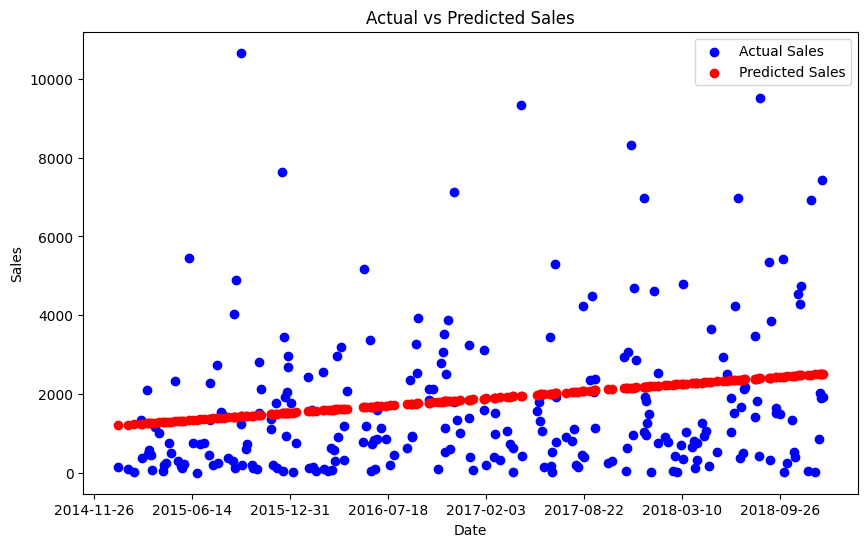

C:\Users\bryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


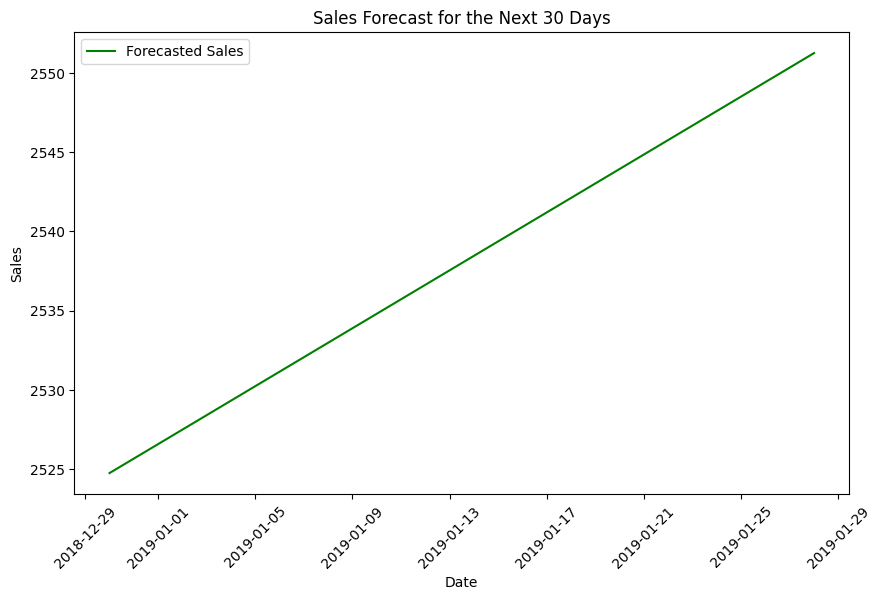

In [18]:
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt  # For plotting graphs
import matplotlib.dates as mdates
import joblib #For saving model

# Load the dataset
df = pd.read_csv('train.csv')

# Convert 'Order Date' to datetime with dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Aggregate sales by date
sales_data = df.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()

# Convert dates into numeric format for regression
sales_data['DateNumeric'] = (sales_data['Order Date'] - pd.Timestamp("1970-01-01")).dt.days

# Prepare data for linear regression
X = sales_data[['DateNumeric']]
y = sales_data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test, y_pred, color='red', label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# Forecast future sales
future_dates = pd.date_range(start=sales_data['Order Date'].max(), periods=30).to_pydatetime()
future_dates_numeric = [(x - pd.Timestamp("1970-01-01")).days for x in future_dates]
future_sales = model.predict(np.array(future_dates_numeric).reshape(-1, 1))

# Save the Linear Regression model
joblib.dump(model, 'sales_forecasting_model.pkl')

# Plot future sales
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_sales, label='Forecasted Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 30 Days')
plt.xticks(rotation=45)
plt.legend()
plt.show()
